In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/daily-total-female-births-CA.csv', header = 0)

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


## Data Type

In [4]:
dataframe['date'].dtype

dtype('O')

### Loading Data with parse_dated

In [5]:
df2 = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/daily-total-female-births-CA.csv', header=0, parse_dates=[0])

### First Five Records

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


### Data Type

In [7]:
df2['date'].dtype

dtype('<M8[ns]')

### Note 

#### dateparse = lambda x:pd.determine.strptime(x, '%Y-%m-%d %H:%M:%S')

#### df = pd.read_csv(......., parse_dates=[0], date_parser = dateparse)

### Loading Data as series

In [8]:
series = df2 = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0)

In [9]:
series.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


# Exploring Time Series Data

In [10]:
series.shape

(365, 1)

In [11]:
df2.shape

(365, 1)

### Querying by time

In [12]:
print(series['1959-01'])  # Printing the values begin from 1959-01

KeyError: '1959-01'

In [13]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

KeyError: 'date'

### Descriptive Statistics

In [14]:
series.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [15]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Time Series - Data Visualization

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
Dataviz_df = df2.copy()

In [18]:
Dataviz_df.head(10)

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


<Axes: xlabel='date'>

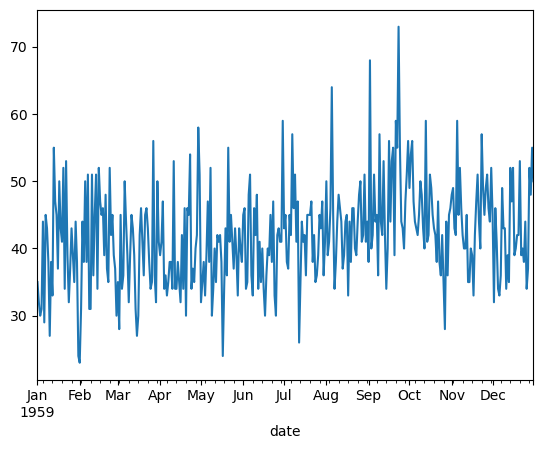

In [19]:
Dataviz_df['births'].plot()

In [20]:
Dataviz_df.index = Dataviz_df['date'] 

KeyError: 'date'

<Axes: xlabel='date'>

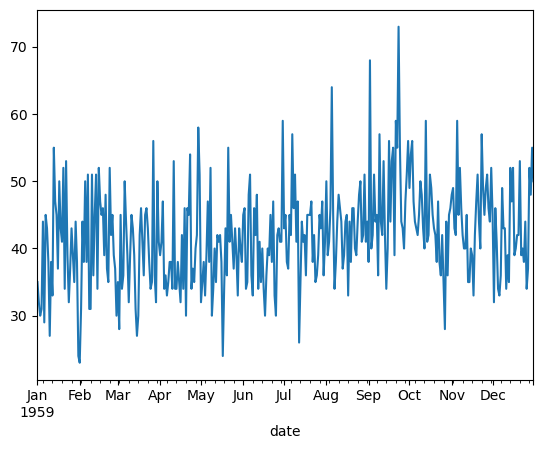

In [21]:
Dataviz_df['births'].plot()

### Zooming In

In [22]:
df2 = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0)

In [23]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-01')].copy()

KeyError: 'date'

In [24]:
Dataviz_df2

NameError: name 'Dataviz_df2' is not defined

In [25]:
dataviz_df2['births'].plot()

NameError: name 'dataviz_df2' is not defined

#### Trendline

In [26]:
import seaborn as sns

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

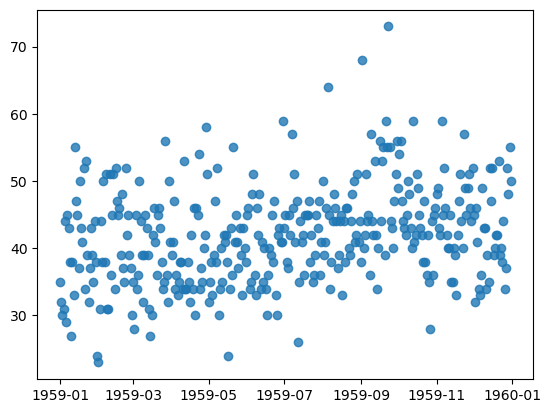

In [27]:
sns.regplot(x = df2.index.values, y=df2['births'])

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

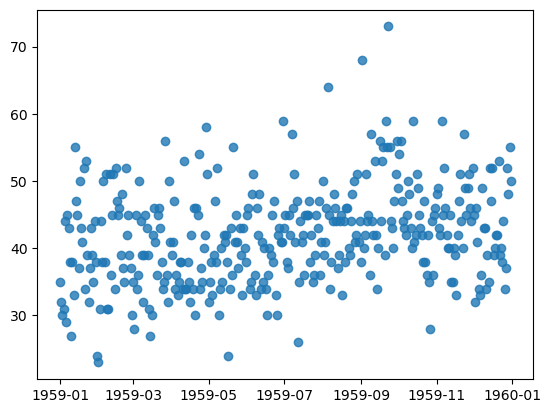

In [28]:
sns.regplot(x = df2.index.values, y = df2['births'], order = 2)

In [29]:
miles_df = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv', header= 0, parse_dates = [0])

In [30]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<Axes: >

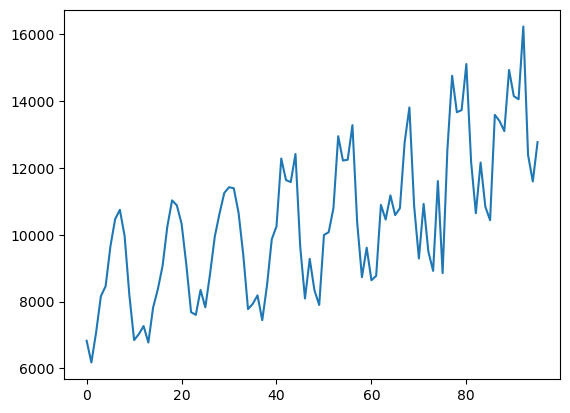

In [31]:
miles_df['MilesMM'].plot()

<Axes: ylabel='MilesMM'>

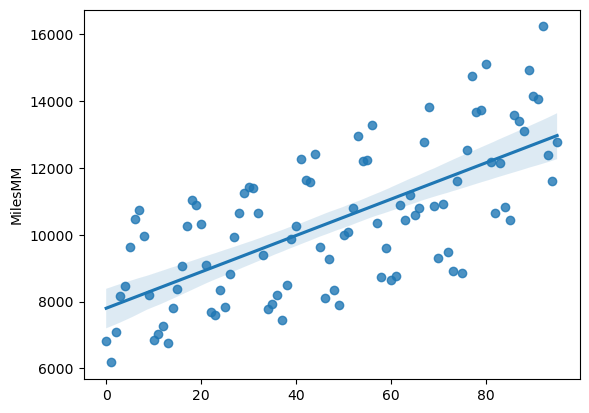

In [32]:
sns.regplot(x = miles_df.index.values, y= miles_df['MilesMM'])

### Removing Seasonality

In [33]:
miles_df['year'] = miles_df['Month'].dt.year

In [34]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [35]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

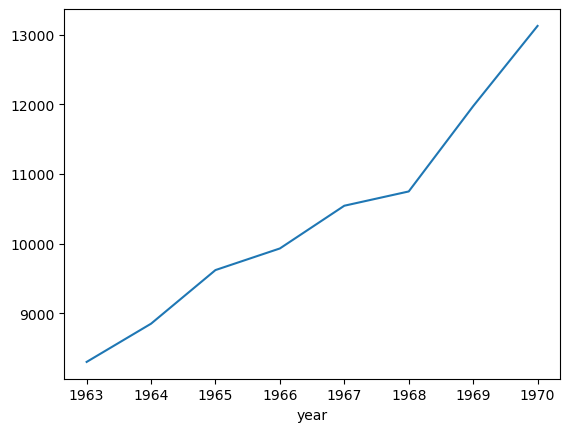

In [36]:
miles_df.groupby('year')['MilesMM'].mean().plot()

## Creating Lag plots

In [37]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [38]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

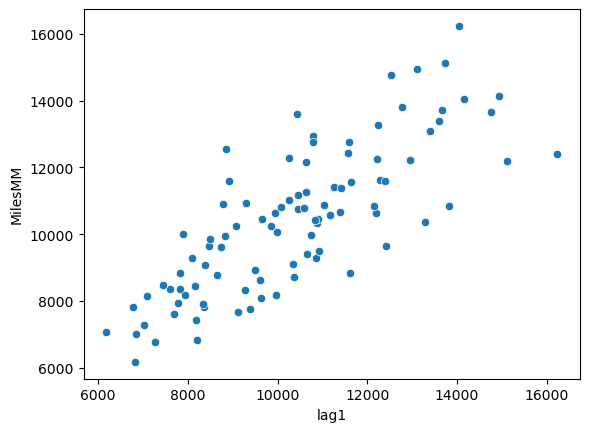

In [39]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [40]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

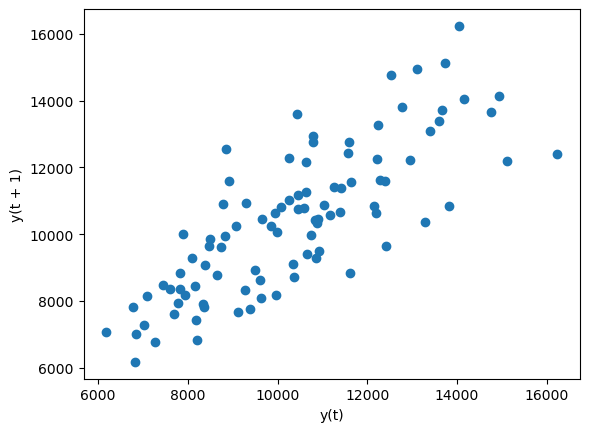

In [41]:
lag_plot(miles_df['MilesMM'])

### Auto Correlation Plots

In [42]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

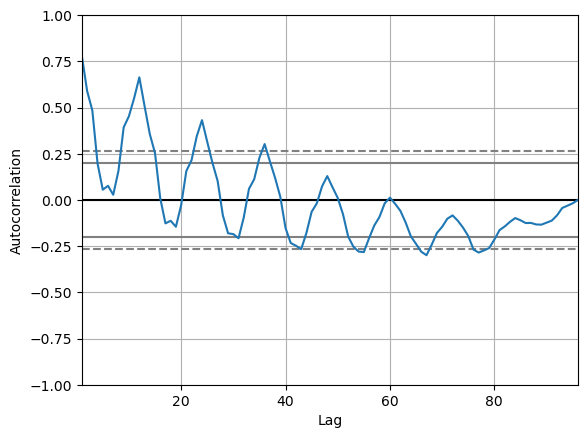

In [43]:
autocorrelation_plot(miles_df['MilesMM'])

# Feature Engineering 

#### Date time feature
#### lag function
#### Window feature
#### Expanding feature

## Date Time Features

In [44]:
df2.head(5)

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [45]:
features = df2

In [46]:
features['year'] = df2['date'].dt.year

KeyError: 'date'

In [47]:
features['month'] = df2['date'].dt.year

KeyError: 'date'

In [48]:
features['day'] = df2['date'].dt.year

KeyError: 'date'

In [49]:
features.head(5)

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


## Lag Feature

In [50]:
features['lag1'] = df2['births'].shift(1)

In [51]:
features['lag2'] = df2['births'].shift(365)

In [52]:
features.head(5)

,births,lag1,lag2
date,,,
1959-01-01,35,NaN,NaN
1959-01-02,32,35.0,NaN
1959-01-03,30,32.0,NaN
1959-01-04,31,30.0,NaN
1959-01-05,44,31.0,NaN


## Window Feature

In [53]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [54]:
features.head(5)

,births,lag1,lag2,Roll_mean
date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,33.5
1959-01-03,30,32.0,NaN,31.0
1959-01-04,31,30.0,NaN,30.5
1959-01-05,44,31.0,NaN,37.5


In [55]:
features['Roll_mean'] = df2['births'].rolling(window = 3).mean()

In [56]:
features.head(5)

,births,lag1,lag2,Roll_mean
date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN
1959-01-03,30,32.0,NaN,32.333333
1959-01-04,31,30.0,NaN,31.000000
1959-01-05,44,31.0,NaN,35.000000


## Expanding features

In [57]:
features['Expand_max'] = df2['births'].expanding().max()

In [58]:
features.head(10)

,births,lag1,lag2,Roll_mean,Expand_max
date,,,,,
1959-01-01,35,NaN,NaN,NaN,35.0
1959-01-02,32,35.0,NaN,NaN,35.0
1959-01-03,30,32.0,NaN,32.333333,35.0
1959-01-04,31,30.0,NaN,31.000000,35.0
1959-01-05,44,31.0,NaN,35.000000,44.0
1959-01-06,29,44.0,NaN,34.666667,44.0
1959-01-07,45,29.0,NaN,39.333333,45.0
1959-01-08,43,45.0,NaN,39.000000,45.0
1959-01-09,38,43.0,NaN,42.000000,45.0


## DownSampling and UpSampling

In [59]:
miles_df = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv', header= 0, parse_dates=[0])

In [60]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### DownSampling (Converting data from higher to lower frequency data) like (Converting weekly data to daily data)

In [61]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [62]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [63]:
yearly_total_miles_df = miles_df.resample('A', on = 'Month').sum()

In [64]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


### UpSampling

In [65]:
unsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [66]:
unsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [67]:
interpolated_miles_df = unsampled_miles_df.interpolate(method='linear')

In [68]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<Axes: xlabel='Month'>

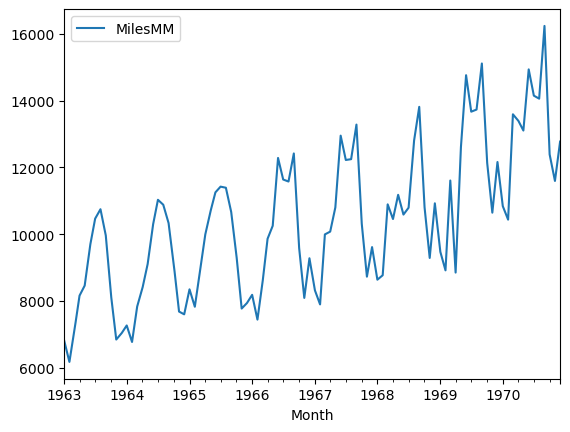

In [69]:
interpolated_miles_df.plot()

In [70]:
poly_interpolated_miles_df = unsampled_miles_df.interpolate(method='spline', order=2)

<Axes: xlabel='Month'>

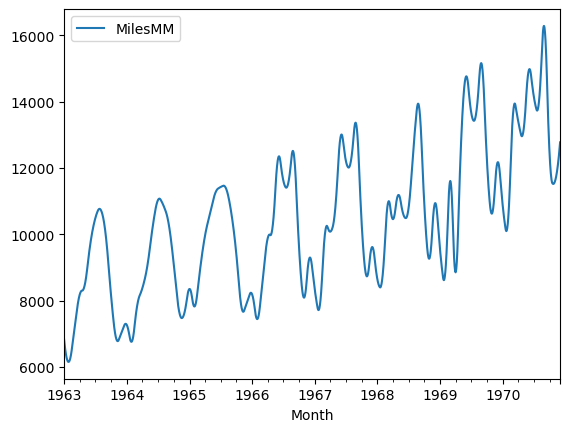

In [71]:
poly_interpolated_miles_df.plot()

# Decomposing Time Series

### Additive Model

y(t) = Level + Trend + seasonality + Noise

### Multplicative Model

y(t) = Level * Trend * seasonality * Noise

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [73]:
miles_decomp_df = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates=[0])

In [74]:
miles_decomp_df.index = miles_decomp_df['Month']

In [75]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

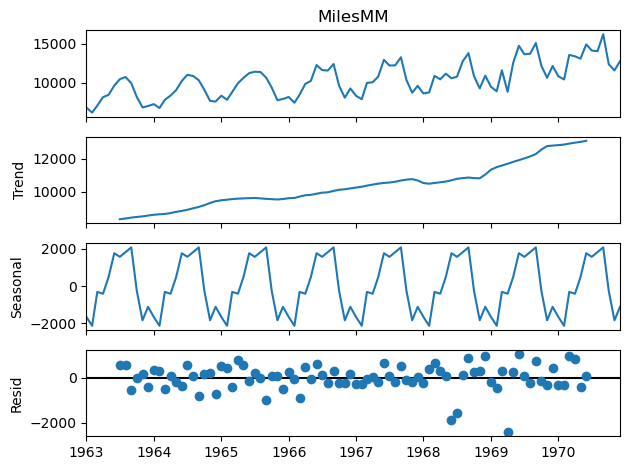

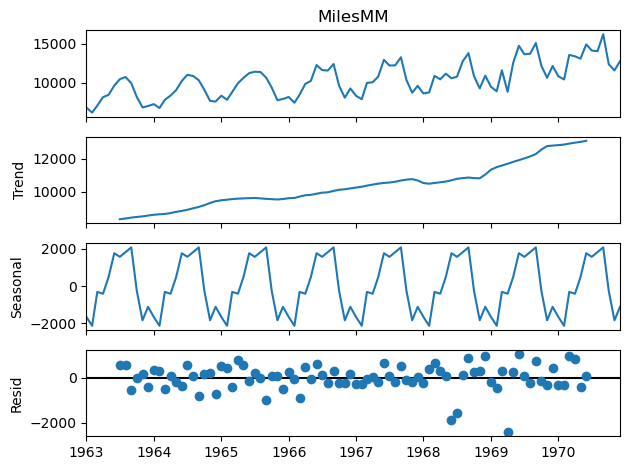

In [76]:
result.plot()

In [77]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

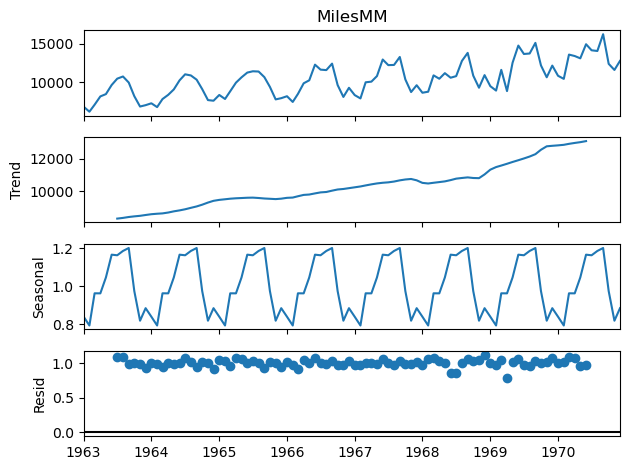

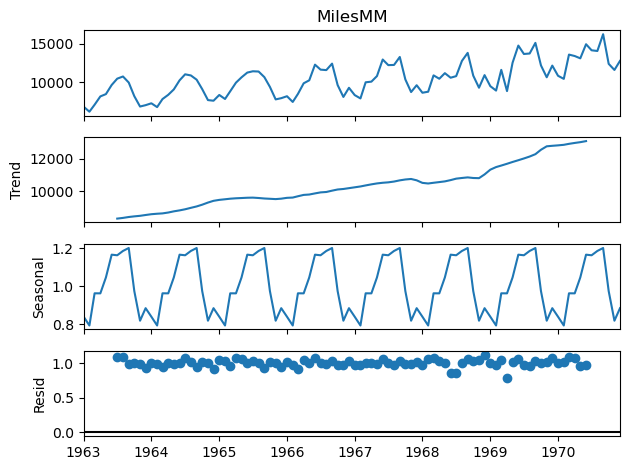

In [78]:
result2.plot()

## Differencing

In [79]:
miles_df = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates=[0])

In [80]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [81]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [82]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [83]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


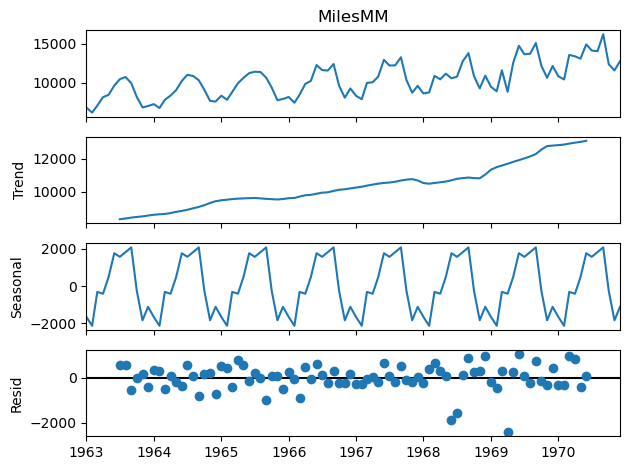

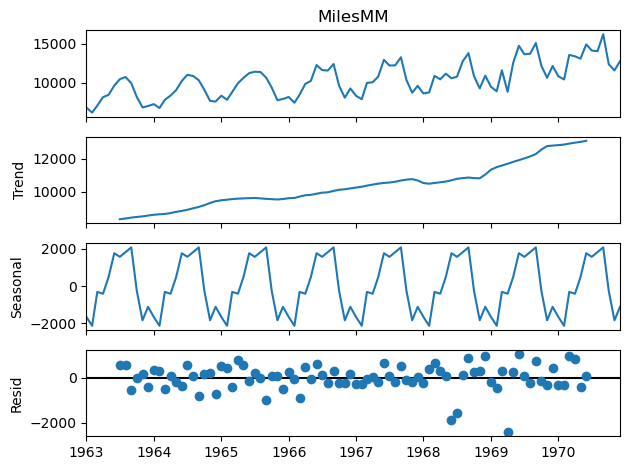

In [84]:
miles_df.index = miles_df['Month']
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

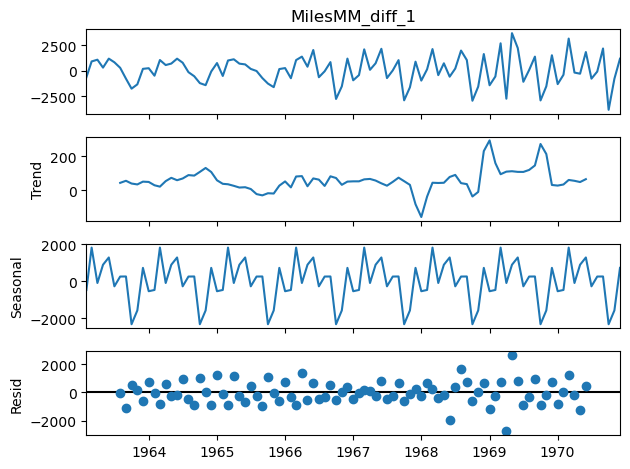

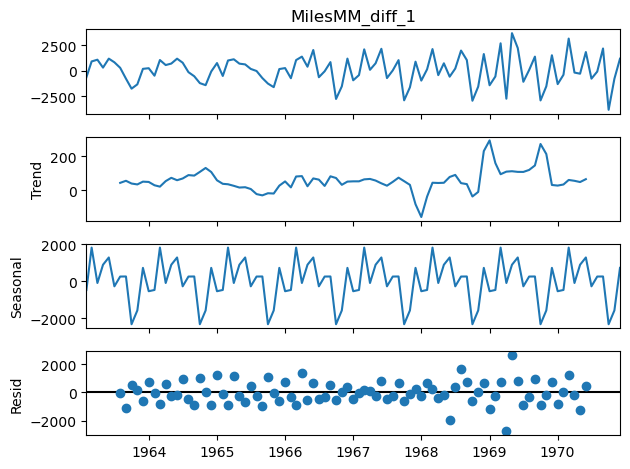

In [85]:
miles_df.index = miles_df['Month']
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

<Axes: xlabel='Month'>

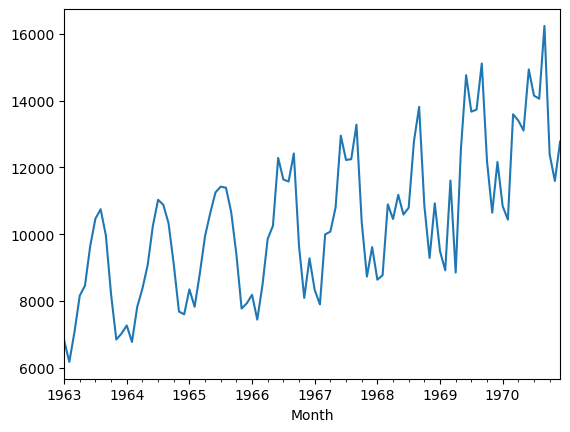

In [86]:
miles_df['MilesMM'].plot()

<Axes: xlabel='Month'>

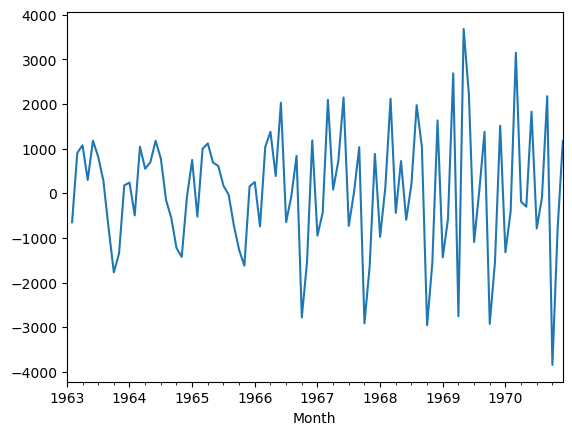

In [87]:
miles_df['MilesMM_diff_1'].plot()

In [88]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods = 12)

<Axes: xlabel='Month'>

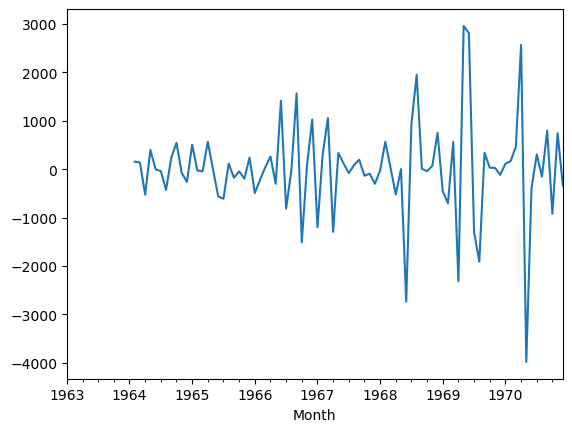

In [89]:
miles_df['MilesMM_diff_12'].plot()

In [90]:
result_b = seasonal_decompose(miles_df.iloc[12:,4], model='additive')
result_b.plot()

ValueError: This function does not handle missing values

In [93]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


## Test Train split for Time Series (Different from all the other models  )

In [94]:
temp_df = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/daily-min-temperatures.csv', header = 0, parse_dates=[0])

In [95]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [96]:
temp_df.shape

(3650, 2)

In [97]:
temp_df.shape[0]

3650

In [98]:
train_size = int(temp_df.shape[0] * 0.8)
train_size

2920

In [99]:
train = temp_df[0:train_size]

In [100]:
test = temp_df[train_size:]

In [101]:
train.shape

(2920, 2)

In [102]:
test.shape

(730, 2)

### Persistence Model 

In [103]:
df = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/daily-min-temperatures.csv', header = 0, parse_dates=[0])

In [104]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [105]:
df['t'] = df['Temp'].shift(1)

In [106]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [107]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [108]:
train

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8
...,...,...,...
3638,1990-12-20,15.4,14.7
3639,1990-12-21,13.1,15.4
3640,1990-12-22,13.2,13.1
3641,1990-12-23,13.9,13.2


In [109]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [110]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

## Walk Forward Validation

In [111]:
predictions = test_X.copy()

In [112]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [113]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [114]:
from matplotlib import pyplot

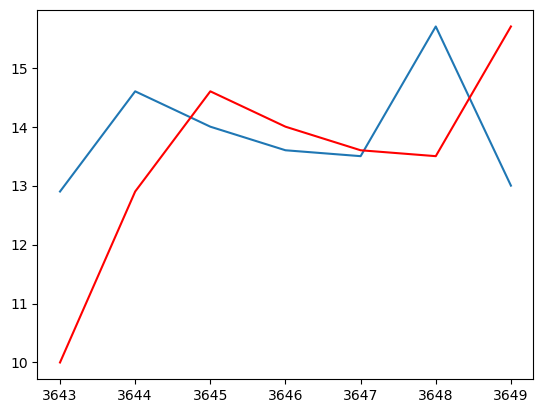

In [115]:
pyplot.plot(test_y)
pyplot.plot(predictions, color="red")

## Auto Regression Model

In [116]:
df = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/daily-min-temperatures.csv', header = 0, parse_dates=[0])

In [117]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [118]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [119]:
from statsmodels.tsa.ar_model import AutoReg as AR

In [120]:
model = AutoReg(train)
model_fit = model.fit()

TypeError: AutoReg.__init__() missing 1 required positional argument: 'lags'

### No of Lags

In [121]:
model_fit.k_ar

NameError: name 'model_fit' is not defined

#### Coef of lag variables

In [122]:
model_fit.params

NameError: name 'model_fit' is not defined

In [123]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

NameError: name 'model_fit' is not defined

In [124]:
predictions

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [125]:
predictions.iloc[0]

10.0

In [126]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

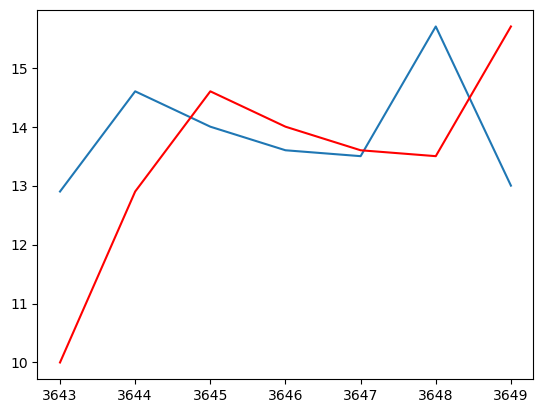

In [127]:
pyplot.plot(test_y)
pyplot.plot(predictions, color="red")

## Walk Forward Validation

In [128]:
df = pd.read_csv('D:/Machine Learning/Complete Machine Learning with Python/Data Files/5. ST Academy - Time Series resource files/daily-min-temperatures.csv', header = 0, parse_dates=[0])

In [129]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [133]:
data = train
predict=[]
for t in test:
    model = AutoReg(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

TypeError: AutoReg.__init__() missing 1 required positional argument: 'lags'

In [134]:
predict

[]

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
mse = mean_squared_error(test.values, predict)
mse

ValueError: Found input variables with inconsistent numbers of samples: [7, 0]

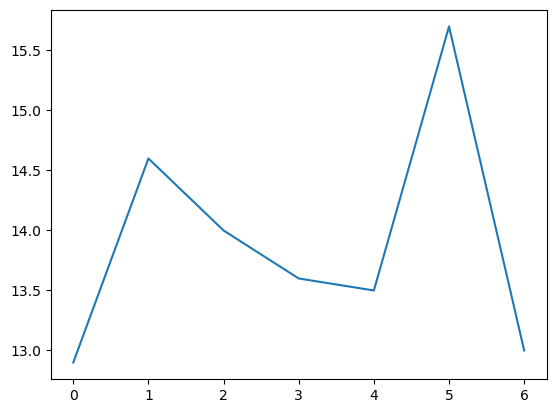

In [137]:
pyplot.plot(test.values)
pyplot.plot(predict, color="red")

## Moving Average Model

In [138]:
df['t'] = df['Temp'].shift(1)

In [139]:
df['Resid'] = df['Temp'] - df['t']

In [140]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [141]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7]

In [142]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [143]:
from statsmodels.tsa.ar_model import AutoReg

In [145]:
model = AutoReg(train)
model_fit = model.fit()

TypeError: AutoReg.__init__() missing 1 required positional argument: 'lags'

In [146]:
model_fit.k_ar

NameError: name 'model_fit' is not defined

In [148]:
model_fit.params

NameError: name 'model_fit' is not defined

In [149]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+ len(test)-1)

NameError: name 'model_fit' is not defined

In [151]:
predictions = df.t[df.shape[0]-7:] + pred_resid

NameError: name 'pred_resid' is not defined

In [152]:
predictions

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [153]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

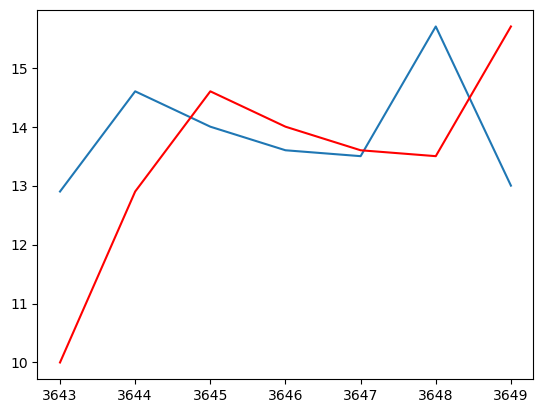

In [155]:
pyplot.plot(test_y)
pyplot.plot(predictions, color="red")